In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import matplotlib as mpl



In [ ]:
import piplite
await piplite.install(['pandas', 'numpy', 'seaborn', 'matplotlib', 'scikit-learn', 'scipy'])
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [7]:
data= pd.read_csv('Pricing Push Ups data.csv')
print("The first 5 rows of the data") 
data.head()## original data set


The first 5 rows of the data


,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,NaN


In [3]:
data.count()

category_2               237
category_3               230
number_of_listings       238
avg_listing_price_eur    238
revenue_from_push_ups    223
dtype: int64

In [129]:
df= data #data frame for data exploratory analysis


We can find more information about the features and types using the info() and describe() methods.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category_2             237 non-null    object 
 1   category_3             230 non-null    object 
 2   number_of_listings     238 non-null    int64  
 3   avg_listing_price_eur  238 non-null    float64
 4   revenue_from_push_ups  223 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.5+ KB


In [5]:
data.describe()

,number_of_listings,avg_listing_price_eur,revenue_from_push_ups
count,2.380000e+02,238.000000,223.000000
mean,5.858680e+04,34.103754,4008.708520
std,1.565780e+05,40.741338,10131.364522
min,1.000000e+00,3.500000,2.000000
25%,1.669250e+03,11.835471,125.000000
50%,6.328500e+03,21.288226,498.000000
75%,3.833075e+04,44.381888,3215.000000
max,1.844512e+06,329.733729,79424.000000


We can see we have missing values for the columns category_2 and category_3 and revenue_from_push_ups.
For categorical columns let's place null with "Other" and for numerical column replace NULL with 0

In [10]:
df['revenue_from_push_ups'].replace(np.nan,0, inplace=True)
df['category_2'].replace(np.nan,'Other', inplace=True)
df['category_3'].replace(np.nan,'Other', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category_2             238 non-null    object 
 1   category_3             238 non-null    object 
 2   number_of_listings     238 non-null    int64  
 3   avg_listing_price_eur  238 non-null    float64
 4   revenue_from_push_ups  238 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.5+ KB


Now we do not have missing values and could start data analysis

Section I: Evaluate current situation

(A) Based on the provided data, what metric can you define to check if users are interested
in this feature and why? Calculate this metric. Which categories perform the best
according to this metric?

We could calculate several additional metrics to see if "push ups" are profitable and add to our data frame.

In [130]:
# Revenue per Listing. This metric helps us to understand how profitable "push ups" notifications are.
df['revenue_per_listing'] = df['revenue_from_push_ups']/df['number_of_listings']
#Average Revenue per Listing Price.This metric helps understand how "push ups" generate revenues compared with amount paid to listers. 
df['revenue_per_listing_price'] = df['revenue_from_push_ups'] / df['avg_listing_price_eur']

In [131]:
# Revenue from push ups per category
total_revenue_from_push_ups= df['revenue_from_push_ups'].sum()
df['revenue_revenue_from_push_ups_per_category'] = df['revenue_from_push_ups'] / total_revenue_from_push_ups*100

In [132]:
# calculate total revenue
df['revenue'] = df['avg_listing_price_eur']*df['number_of_listings']
# calculate proporcion from "push ups"  and total revenue
df['revenue_from_push_ups_rate'] = df['revenue_from_push_ups']/df['revenue']*100


In [60]:
#calculate some descriptive statistics
average_revenue_from_push_ups= data['revenue_from_push_ups'].mean()
print(average_revenue_from_push_ups)
average_listing_price = data['avg_listing_price_eur'].mean()
print(average_listing_price)

3756.0588235294117
34.103754218676464


In [133]:
df.head()

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups,revenue_per_listing,revenue_per_listing_price,revenue_revenue_from_push_ups_per_category,revenue,revenue_from_push_ups_rate
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0,0.034580,17.520212,0.055037,3.995486e+05,0.123139
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0,0.046317,64.964486,0.154596,6.347486e+05,0.217724
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0,0.047874,17.836335,0.034007,1.082285e+05,0.280887
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0,0.059838,1145.971092,2.299254,6.160849e+06,0.333623
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,0.0,0.000000,0.000000,0.000000,7.950000e+01,0.000000


Lets look which categories generates the most revenues from "push ups"

In [148]:
#total_listings = df['number_of_listings'].sum()
#total_listings = df['number_of_listings'].sum()
revenue_per_category = df.groupby(['category_2', 'category_3'])['revenue_from_push_ups'].sum().reset_index()
revenue_per_category.sort_values('revenue_from_push_ups',ascending=False).head(10)

,category_2,category_3,revenue_from_push_ups
222,WOMENS,DRESSES,79424.0
234,WOMENS,TOPS_T_SHIRTS,76166.0
227,WOMENS,OUTERWEAR,57032.0
228,WOMENS,PULLOVERS_SWEATERS,47128.0
105,FOOTWEAR,W_TRAINERS,43358.0
223,WOMENS,JEANS,25316.0
221,WOMENS,COATS_JACKETS,25214.0
230,WOMENS,SKIRTS,23660.0
39,BAGS_BACKPACKS,HANDBAGS,23136.0
95,FOOTWEAR,HIGH_HEELS,23110.0


We see that on tops is clothes for women. So lets look of the same categories are the most profitable either

In [13]:
revenue_per_category2 = df.groupby(['category_2'])['revenue_per_listing_price'].sum().reset_index()
revenue_per_category2.sort_values('revenue_per_listing_price',ascending=False).head()


,category_2,revenue_per_listing_price
35,WOMENS,21729.164836
13,GIRLS_CLOTHING,8454.288165
8,CLOTHING_FOR_BOYS,6905.621282
12,FOOTWEAR,3494.812490
0,ACCESSORIES_JEWELLERY,2256.586728


In [42]:
revenue_per_category_tot = df.groupby(['category_2', 'category_3'])['revenue_revenue_from_push_ups_per_category'].sum().reset_index()
revenue_per_category_tot.sort_values('revenue_revenue_from_push_ups_per_category',ascending=False).head(10)

,category_2,category_3,revenue_revenue_from_push_ups_per_category
222,WOMENS,DRESSES,8.884693
234,WOMENS,TOPS_T_SHIRTS,8.520240
227,WOMENS,OUTERWEAR,6.379832
228,WOMENS,PULLOVERS_SWEATERS,5.271930
105,FOOTWEAR,W_TRAINERS,4.850203
223,WOMENS,JEANS,2.831951
221,WOMENS,COATS_JACKETS,2.820541
230,WOMENS,SKIRTS,2.646704
39,BAGS_BACKPACKS,HANDBAGS,2.588087
95,FOOTWEAR,HIGH_HEELS,2.585179


In [43]:
revenue_per_category_tot.sort_values('revenue_revenue_from_push_ups_per_category',ascending=True).head(10)

,category_2,category_3,revenue_revenue_from_push_ups_per_category
82,COSMETICS_AND_BEAUTY_ITEMS,MEN_COS_OTH_COSMETICS,0.0
92,COSMETICS_AND_BEAUTY_PRODUCTS,W_HAIR_COSMETICS,0.0
58,CHILD_SAFETY,BAB_CHI_OTHER,0.0
75,CLO_SETS,Other,0.0
12,ACCESSORIES_JEWELLERY,W_ACC_UMBRELLAS,0.0
171,MEN_SHOES_NEW,MEN_SLIPPERS_FLIPFLOPS,0.0
47,BAGS_BACKPACKS,W_BUM_BAGS,0.0
84,COSMETICS_AND_BEAUTY_PRODUCTS,BEAUTY_HAND_ONLY,0.0
49,BAGS_BACKPACKS,W_LUGGAGE,0.0
78,COSMETICS_AND_BEAUTY_ITEMS,HAIR_CARE,0.0


In [14]:
revenue_per_category = df.groupby(['category_2', 'category_3'])['revenue_per_listing_price'].sum().reset_index()
revenue_per_category.sort_values('revenue_per_listing_price',ascending=False).head(10)

,category_2,category_3,revenue_per_listing_price
234,WOMENS,TOPS_T_SHIRTS,7274.718339
228,WOMENS,PULLOVERS_SWEATERS,3247.343261
222,WOMENS,DRESSES,1996.392060
230,WOMENS,SKIRTS,1787.109893
223,WOMENS,JEANS,1314.041717
235,WOMENS,TROUSERS,1244.295556
227,WOMENS,OUTERWEAR,1222.862010
3,ACCESSORIES_JEWELLERY,JEWELRY,1145.971092
118,GIRLS_CLOTHING,OUTDOOR_CLOTHES,1144.893826
89,COSMETICS_AND_BEAUTY_PRODUCTS,WOM_COS_MAK_COSMETICS,1097.829934


On top women's clothers appears also but we some different categories than just looking in total revenue from "push ups" 

(B) Define a metric that – apart from category – shows a strong correlation with the metric
you have found in the previous question. Discuss the relationship between both metrics
using a graph.

Lets find correlations between metrics. From previous question "revenue_per_listing_price" is the metric we need to compare with others

In [58]:
corr_matrix = df.corr(method='spearman')# kendall, spearman, pearson all 3 checkedS
print(corr_matrix)

<ipython-input-58-8bdbd6d7f091>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='spearman')#, ‘kendall’, ‘spearman’}


                                            number_of_listings  \
number_of_listings                                    1.000000   
avg_listing_price_eur                                -0.176819   
revenue_from_push_ups                                 0.952962   
revenue_per_listing                                   0.081447   
revenue_per_listing_price                             0.977954   
revenue_revenue_from_push_ups_per_category            0.952962   
revenue                                               0.921880   
revenue_from_push_ups_rate                            0.939782   

                                            avg_listing_price_eur  \
number_of_listings                                      -0.176819   
avg_listing_price_eur                                    1.000000   
revenue_from_push_ups                                    0.053963   
revenue_per_listing                                      0.769240   
revenue_per_listing_price                               -0.2

For us the most interesting metric is revenue_from_push_ups. Thes metrics have the strongest(close to 1) correlations:                                         
number_of_listings                                       0.952962   
revenue_per_listing_price                                0.936572   
revenue_revenue_from_push_ups_per_category               1.000000   
revenue                                                  0.975372   
revenue_from_push_ups_rate                               0.993548 
Also between others metrics strong correlations exist:
correlation between "revenue_per_listing_price" and "number_of_listings" (0.979273) and 
between "revenue_revenue_from_push_ups_per_category" and "number_of_listings". 
Which is logical because they each are related with formula with each other.
Strong correlations could be visible from scatter plots also.


In [16]:
import piplite
await piplite.install(['seaborn'])

In [17]:
import seaborn as sns 

<AxesSubplot:xlabel='revenue_from_push_ups', ylabel='revenue_per_listing_price'>

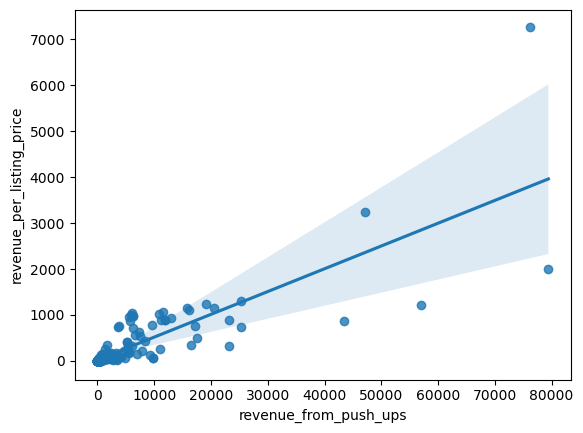

In [16]:
sns.regplot(x='revenue_from_push_ups',y='revenue_per_listing_price', data=df)

We see strong correlation from plot also

<AxesSubplot:xlabel='number_of_listings', ylabel='revenue_per_listing_price'>

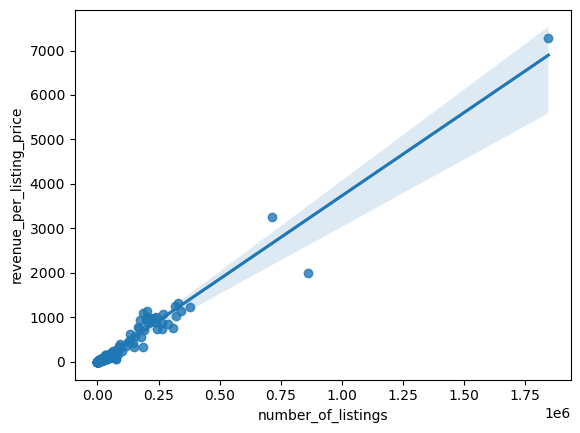

In [17]:
sns.regplot(x='number_of_listings',y='revenue_per_listing_price', data=df)

<AxesSubplot:xlabel='revenue_per_listing', ylabel='avg_listing_price_eur'>

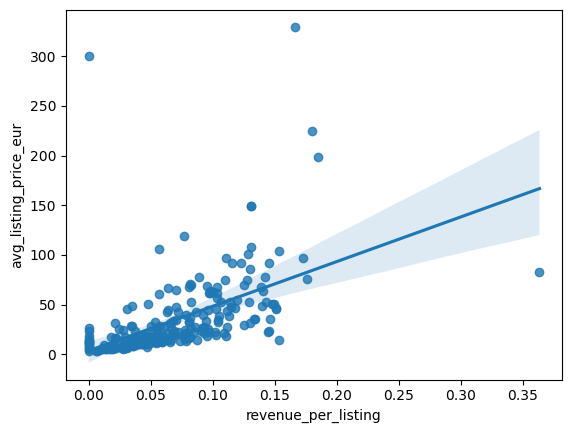

In [22]:
sns.regplot(x='revenue_per_listing',y='avg_listing_price_eur', data=df)##??

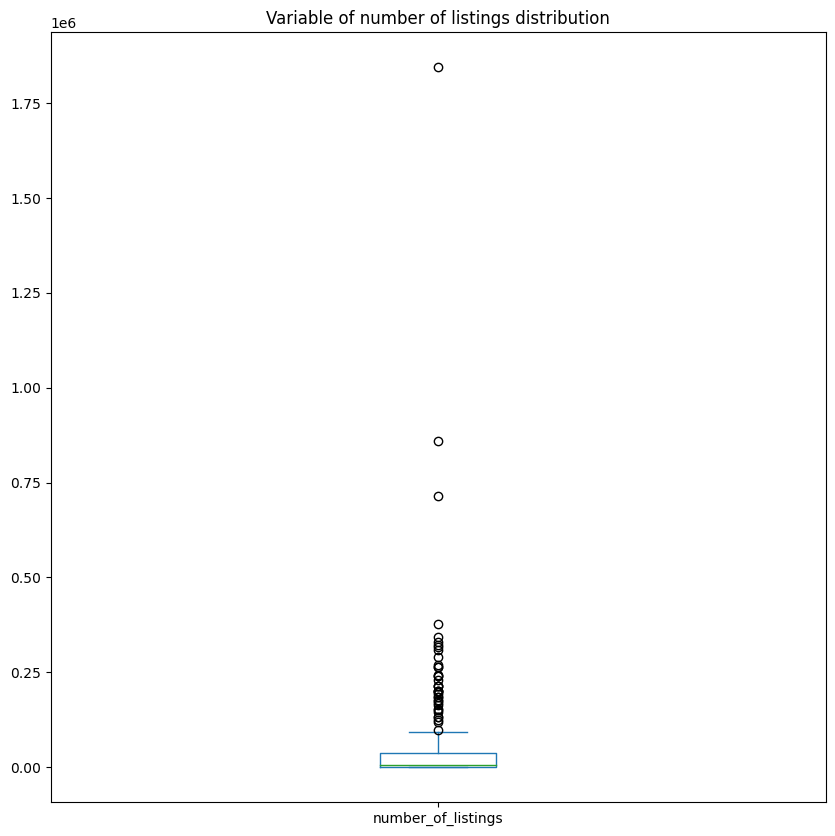

In [27]:
import matplotlib.pyplot as plt
df_number_of_listings = df[['number_of_listings']]
df_number_of_listings.plot(kind='box', figsize=(10, 10))
plt.title('Variable of number of listings distribution')
plt.show()


Text(0.5, 1.0, 'Revenue per listings price distribution')

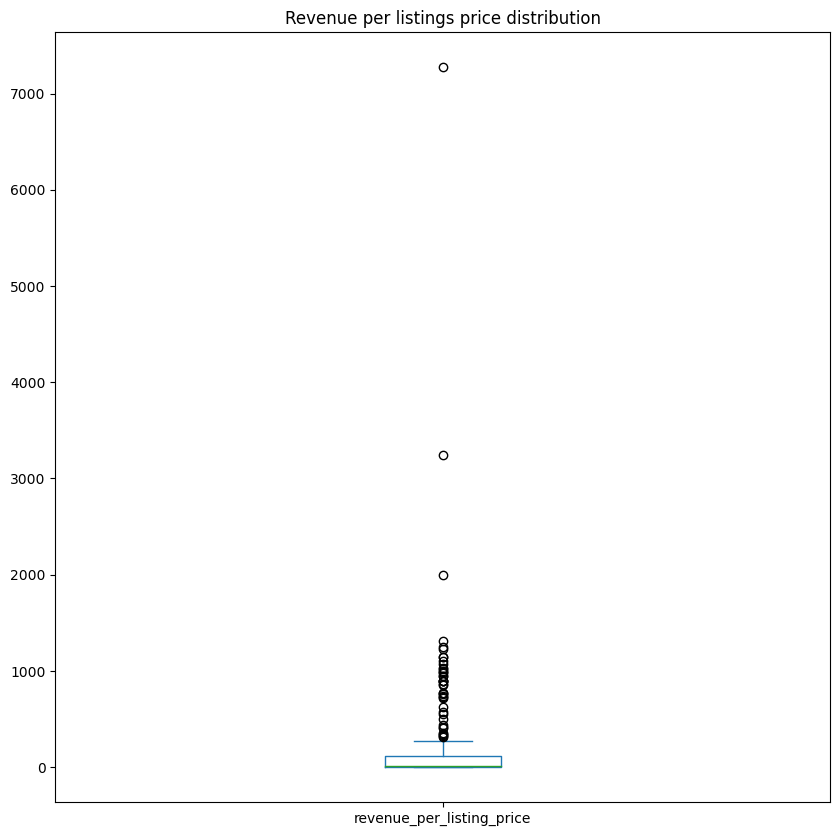

In [29]:
df_revenue_per_listing_price = df[['revenue_per_listing_price']]
df_revenue_per_listing_price.plot(kind='box', figsize=(10, 10))
plt.title('Revenue per listings price distribution')


Text(0.5, 1.0, 'Revenue per listing price distribution')

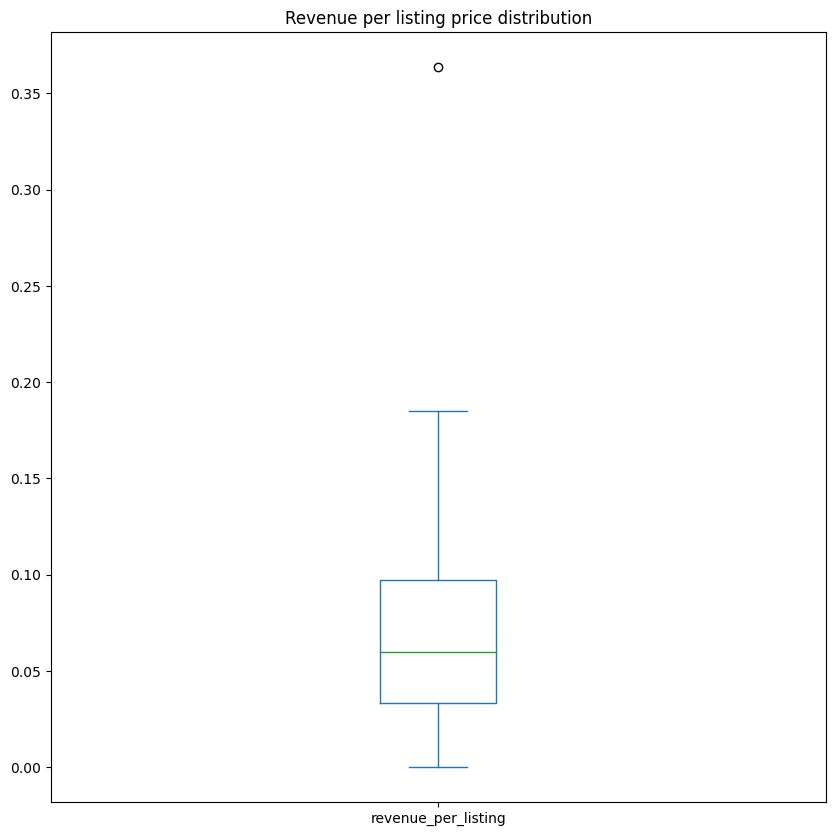

In [30]:
df_revenue_per_listing_price = df[['revenue_per_listing']]
df_revenue_per_listing_price.plot(kind='box', figsize=(10, 10))
plt.title('Revenue per listing price distribution')


Now we could see that revenue of pushs ups, avg_listings, revenue_per_listing_price are very distributed per categories and have a lot outliers. So we need to look into boxplots for each category

<AxesSubplot:xlabel='category_2', ylabel='revenue_per_listing_price'>

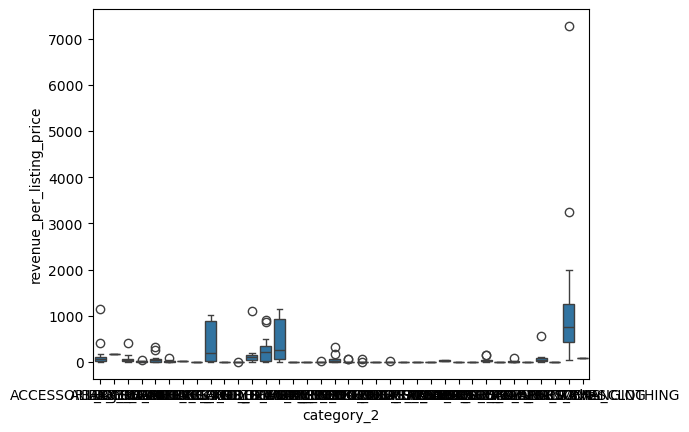

In [65]:
sns.boxplot(x=df['category_2'],y='revenue_per_listing_price',data=df)

(C) Explain without additional calculations how the push up feature is performing in your
opinion. Is there room for improvement? Why (not)?

From the data we could see there are some categories which generate big amounts of revenues from "push ups" (womens clothes). Looks like it helps to  sell more expensive items. We could adapt "push ups" price according to the price of items. If "push ups" price is 50% of item price it is logic not to use this feature

(D) In the GIRLS_CLOTHING / FOR_BABIES category, the price of the push up feature is
more than half of the average listing price. However, there are still sellers willing to pay
for the feature. Why do you think this is the case?

Most sellers of this categories are women (which geberate the biggest revenues and items are the most expensive. Usually when you are looking for some items in Vinted and decide to buy from specific seller you look through all items in profile and maybe you will decide to get more items from another category (GIRLS_CLOTHING / FOR_BABIES). It would be cheaper because of transportations costs and you could get a discount of buyeing more than one item.
Another reason could be that sellers from this category have a lot of items since babies are growing up very fast. So seller could invest into a fwe items but sell much more (users will look into other items of sellers)

Section II: Analyse alternative strategies

(A) Your colleague suggests setting a fixed price for the “push up” feature different from €2.
What implications will a price increase / decrease have on the business, e.g. visibility of
listing on the platform?

Firstly discuss from market perspective.
A. If "push ups" price would increase:
    1. Revenue impact: higher proce will increase revenue per user but it could decrease number of users
    2. User engagment: users who use this feature are likely more engaged and they will still use it but some users might be priced out of using the feature
, leading to decreased overall engagement and dissatisfaction among price-sensitive users.
B. If price would decrease
    1. Revenue impact:lower prices can attract more users to purchase the feature, potentially increasing the total revenue if the increased volume offsets the lower price.But lower price will generate less revenue if users amount won't be sufficient.
    2. User engagment: More users might be able to afford and use the feature, leading to increased engagement and satisfaction across a broader user base. But also there could be quality issues if too many listings are promotedS

lets calculate more metrics of revenues

In [63]:
total_revenue_from_listings=df['revenue'].sum()
listings_with_push_ups_engagement = (total_revenue_from_push_ups / total_revenue_from_listings) *100
print("Total revenue: ", total_revenue_from_listings)
print("Revenue from push ups: ",total_revenue_from_push_ups)
print("Push ups rate: ", listings_with_push_ups_engagement)
#listings_with_push_ups = df[df['revenue_from_push_ups'] > 0]['number_of_listings'].sum()
#total_listings = df['number_of_listings'].sum()
#listings_with_push_ups_engagement = (listings_with_push_ups / total_listings) * 100 ## very big percentage

Total revenue:  303689053.2399223
Revenue from push ups:  893942.0
Push ups rate:  0.29436095587342836


Estimate Price Elasticity. It is a measure of how sensitive the quantity demanded is to its price.
When the price rises, quantity demanded falls for almost any good

In [144]:
# Assumed price elasticity of demand. Not sure if it is correct inS this market. Need more knowledge
assumed_elasticity = -1.5

# Current data
current_price = 2

current_quantity =  df['revenue_per_listing'].sum()# this is amount of listings with feature "push ups"
 

# New price
new_price = 3

# Calculate the percentage change in price
pct_change_price_new = (new_price - current_price) / current_price
# Estimate the percentage change in quantity using assumed elasticity
pct_change_quantity_new = assumed_elasticity * pct_change_price_new

# Estimate new quantity
new_quantity = current_quantity * (1 + pct_change_quantity_new)

# Calculate new revenue
new_revenue = new_price * new_quantity
print(f"Current Revenue at {current_price} EUR: {current_price*current_quantity:.2f} EUR")
print(f"Estimated Revenue at {new_price} EUR: {new_revenue:.2f} EUR")
print(f"If we increase price 50% new revenue from push ups could decrease {current_price*current_quantity/new_revenue*100-100}%")

Current Revenue at 2 EUR: 32.54 EUR
Estimated Revenue at 3 EUR: 12.20 EUR
If we increase price 50% new revenue from push ups could increase 166.66666666666663%


In [145]:
assumed_elasticity = -1.5

# Current data
current_price = 2

current_quantity = df['revenue_per_listing'].sum()# this is amount of listings with feature "push ups"
# New price
new_price = 1

# Calculate the percentage change in price
pct_change_price_new = (new_price - current_price) / current_price
# Estimate the percentage change in quantity using assumed elasticity
pct_change_quantity_new = assumed_elasticity * pct_change_price_new

# Estimate new quantity
new_quantity = current_quantity * (1 + pct_change_quantity_new)
# Calculate new revenue
new_revenue = new_price * new_quantity

print(f"Current Revenue at {current_price} EUR: {current_price*current_quantity:.2f} EUR")
print(f"Estimated Revenue at {new_price} EUR: {new_revenue:.2f} EUR")
print(f"If we decrease price 50% new revenue from push ups could increase {(current_price*current_quantity)/new_revenue*100-100}%")


Current Revenue at 2 EUR: 32.54 EUR
Estimated Revenue at 1 EUR: 28.47 EUR
If we decrease price 50% new revenue from push ups could increase 14.285714285714278%


If we could believe in assumed_elasticity the conclusion could be that the revenue will decrease based on increased quantity. According to this we could suggest make price lowew to have more money from "push ups"

(B) Another colleague proposes to implement a dynamic pricing strategy, that is, make the
feature price relative to the average listing price. Calculate the relative feature price
percentage that maximises the push up revenue. Given this percentage, what is the
expected revenue and is this an improvement over the current strategy?
We expect analytical depth in your answer here. Please leverage the data that is
available to come to a data-driven estimation of the revenue improvement.

We need to do A/B testing here. We have already noticed that revenue from "push ups" strongly relates with categories and for example for women's clothes revenues are much bigger. Lets look into this data one more time


In [154]:
revenue_per_category = df.groupby(['category_2'])['revenue_per_listing_price'].sum().reset_index()
revenue_per_category.sort_values('revenue_per_listing_price',ascending=False).head(10)


,category_2,revenue_per_listing_price
35,WOMENS,21729.164836
13,GIRLS_CLOTHING,8454.288165
8,CLOTHING_FOR_BOYS,6905.621282
12,FOOTWEAR,3494.812490
0,ACCESSORIES_JEWELLERY,2256.586728
11,COSMETICS_AND_BEAUTY_PRODUCTS,1815.711618
4,BAGS_BACKPACKS,895.471061
2,BABY_CARE,809.914350
33,TOYS_AND_GAMES,786.984880
17,MEN_CLOTHING,759.717318


Calculate revenue statistics for some categories and check if means of revenues from push ups are the statisticaly equal.
If means are different then we could think of dynamic pricing strategy based on different category


Parameter of Interest: revenue_from_push_ups
Null Hypothesis: mean1 = mean2
Alternative Hypthosis: mean1 <> mean2
mean1 = mean of revenue_from_push_ups in sample where category_2 = WOMENS
mean2 = mean of revenue_from_push_ups in sample where category_2 = TOYS_AND_GAMES

In [167]:
import statsmodels.api as sm
women_df = df[df['category_2'] == 'WOMENS']
toys_df = df[df['category_2'] == 'TOYS_AND_GAMES']

sm.stats.ztest(women_df["revenue_from_push_ups"].dropna(), toys_df["revenue_from_push_ups"].dropna())



(2.282327635123487, 0.022470004164100204)

In [ ]:
The Statsmodels ztest function carries out the test and returns a test statistic (2.282327635123487) and p-value (0.02247). The p-value is quite small (0.02247<0.05), 
and therefore there is very strong evidence against the null hypothesis.
So mean of revenue from push ups in different categories are different. Based on that we could think of dinamic pricing strategy.

(C) What do you think are the uncertainties in your analysis of the dynamic pricing strategy?

In [ ]:
In data I miss one very important metric: how many items have "push ups" feature. If we would have this data it would be much more easier to create linear regresion 
and predict revenues in total or from this feature based on price

Section III: Next steps

(A) Before fully scaling dynamic pricing of push-ups, what should we do first?

More analysis per category, A/B testing per category, statistical models

(B) If you had to restrict the original "push up" feature (i.e. fixed 2EUR pricing) to one
low-level category on the platform, which one would it be and why?

I would suggest to leave this feature in the category where number of listed items is the biggest:
category_2 = WOMENS	category_3 = TOPS_T_SHIRTS
to have bigger posibility if the user would use this feature
despite womens dresses generate more revenue from push ups (79424>761660 but difference is quite small



(C) How would you increase the number of users that are using the "push up" feature?

There could be several suggestions:
1. Offer a subscription-based package where sellers pay a monthly fee for a certain number of "push ups"
2. Offer discount if use "push ups" more than once per month or per item
3. Calculate "push ups" price based on selling item where feature is not expensive than 2 euro but could less depending on price of item